# Image Segmentation

In [1]:
IMAGE = '../data/original_images/41.tif'

In [2]:
import sys
sys.path.append('../src/')

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from segmentation.fcm import FCM

Text(0.5, 1.0, 'Original Image')

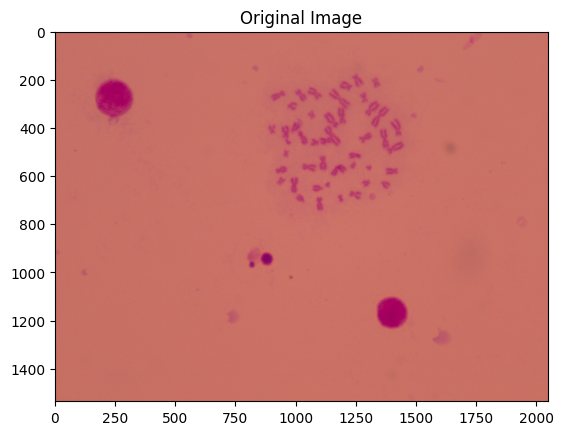

In [3]:
original_image: np.ndarray = cv.imread(IMAGE)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')

## K-means

In [4]:
image: np.ndarray = cv.imread(IMAGE)
image: np.ndarray = cv.cvtColor(image, cv.COLOR_BGR2RGB)
reshaped = image.reshape((-1, 3))
reshaped = np.float32(reshaped)

In [5]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 3
retval, labels, centers = cv.kmeans(reshaped, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

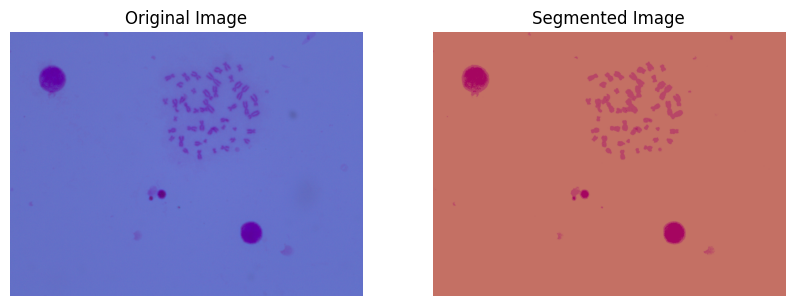

In [6]:
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((image.shape))
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.ravel()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[1].imshow(segmented_image)
axes[1].set_title('Segmented Image')
axes[1].set_axis_off()

# Mean-Shift

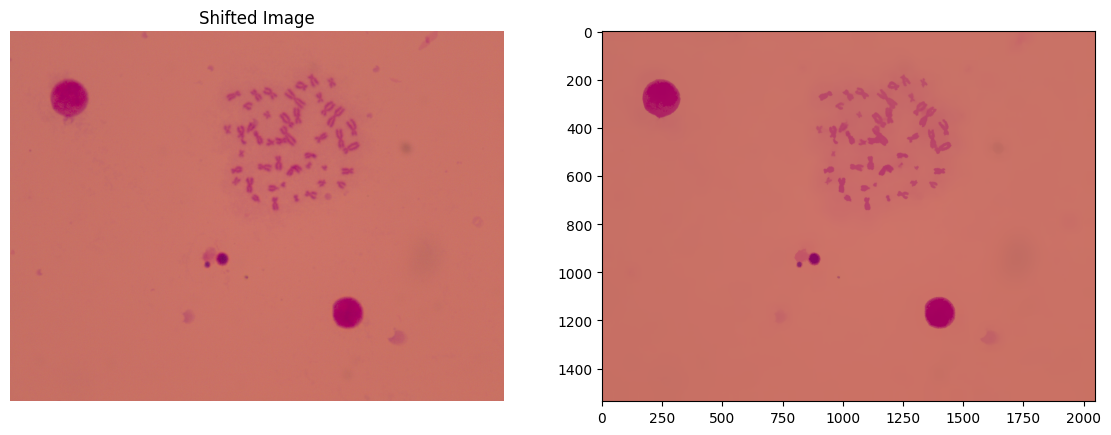

In [7]:
image: np.ndarray = cv.imread(IMAGE)
shifted = cv.pyrMeanShiftFiltering(src=image, sp=30, sr=20)
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
axes = axes.ravel()
axes[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[1].imshow(cv.cvtColor(shifted, cv.COLOR_BGR2RGB))
axes[0].set_title('Shifted Image')
axes[0].set_axis_off()

### Fuzzy C-Means

Iteration 0 : cost = 3145619.132854
Iteration 1 : cost = 31630.134497
Iteration 2 : cost = 125731.047576
Iteration 3 : cost = 458997.704490
Iteration 4 : cost = 905423.897157
Iteration 5 : cost = 1056554.968121
Iteration 6 : cost = 684621.548016
Iteration 7 : cost = 403752.133926
Iteration 8 : cost = 334554.169734
Iteration 9 : cost = 308341.211200
Iteration 10 : cost = 256602.949980
Iteration 11 : cost = 159055.798646
Iteration 12 : cost = 72777.383448
Iteration 13 : cost = 33306.581860
Iteration 14 : cost = 17279.428785
Iteration 15 : cost = 9731.576480
Iteration 16 : cost = 5734.106476
Iteration 17 : cost = 3468.287061
Iteration 18 : cost = 2129.337501
Iteration 19 : cost = 1319.078514
Iteration 20 : cost = 821.625568
Iteration 21 : cost = 513.517990
Iteration 22 : cost = 321.634160
Iteration 23 : cost = 201.722021
Iteration 24 : cost = 126.620224
Iteration 25 : cost = 79.520239
Iteration 26 : cost = 49.956689
Iteration 27 : cost = 31.390503
Iteration 28 : cost = 19.726868
Iteration

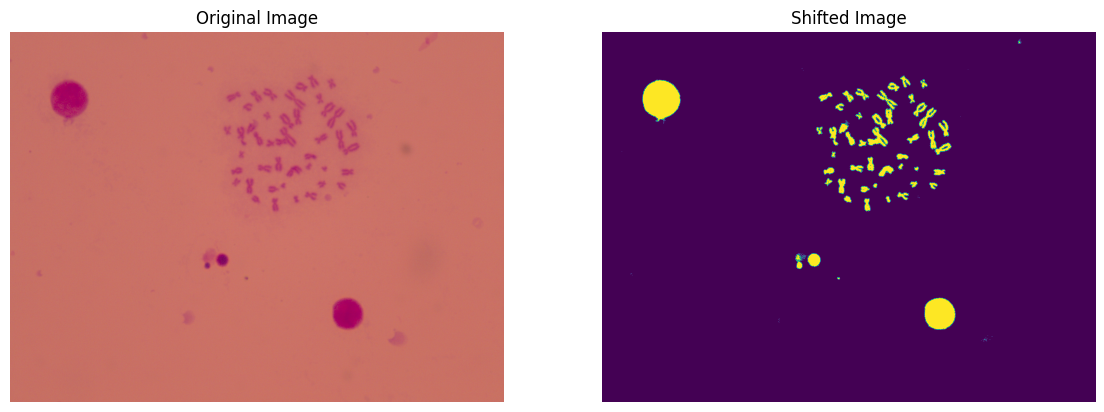

In [24]:
image: np.ndarray = cv.imread(IMAGE, cv.IMREAD_GRAYSCALE)
fcm = FCM(image, n_clusters=2, m=2, epsilon=2, max_iter=100)
result = fcm.form_clusters()
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
axes = axes.ravel()
axes[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[1].imshow(result)
axes[1].set_title('Shifted Image')
axes[1].set_axis_off()